# Task 1   Object detection

# What is Object Detection?

Object detection can be defined as a branch of computer vision which deals with the localization and the identification of an object. Object localization and identification are two different tasks that are put together to achieve this singular goal of object detection.


# Libraries used in object dectection

1. OpenCv:- OpenCV is a huge open-source library for computer vision, machine learning, and image processing. OpenCV supports a wide variety of programming languages like Python, C++, Java, etc. It can process images and videos to identify objects, faces, or even the handwriting of a human.

2. Matplotlib:- Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.
matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

# Image Classification With MobileNet
MobileNet is a class of CNN that was open-sourced by Google, and therefore, this gives us an excellent starting point for training our classifiers that are insanely small and insanely fast.
MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
labels=[]
file_name="labels.txt"
with open(file_name,"rt") as fpt:
    labels=fpt.read().rstrip('\n').split('\n')

In [7]:
len(labels)

80

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000022DFBED5BD0>

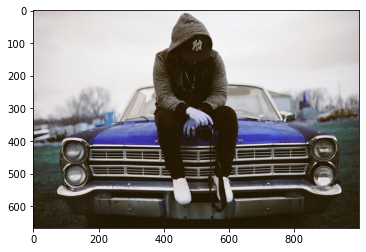

In [11]:
img=cv2.imread("crp.jpg")
plt.imshow(img)

In [12]:
ClassIndex, confidence, bbox=model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[[1]
 [3]
 [3]]


In [14]:
labels[2]

'car'

In [15]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,labels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,0,255),thickness=2)


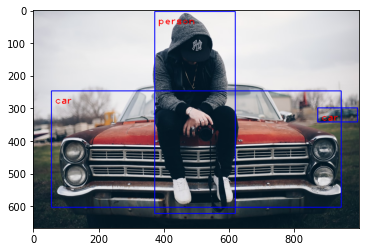

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [17]:
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cap = cv2.VideoCapture("y2mate.com - RANGE ROVER EVOQUEPOWERWHATSAPP STATUS_1080p (online-video-cutter.com).mp4")
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
while(cap.isOpened()):
    ret, frame = cap.read()
    ClassIndex, confidence, bbox=model.detect(frame,confThreshold=0.5)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,labels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('img',frame)
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

[[3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]]
[[ 3]
 [ 3]
 [ 1]
 [42]
 [ 3]]
[[ 3]
 [ 3]
 [ 1]
 [ 3]
 [42]]
[[3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]


 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 1]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 1]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [ 8]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [ 3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]]
[[ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [33]
 [ 3]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [33]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [8]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [8]
 [3]
